In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/hanoi-2015-01-01-to-2025-07-03.csv")

In [3]:
df = df.drop(['precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'solarenergy', 'severerisk', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations'], axis=1)


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y')

In [5]:
def find_missing_percent(data):
    miss_data = []
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val / data.shape[0]) * 100, 2)
        miss_data.append({'ColumnName': col, 'TotalMissingVals': sum_miss_val, 'PercentMissing': percent_miss_val})
    miss_df = pd.DataFrame(miss_data)
    return miss_df

miss_df = find_missing_percent(df)
miss_df[miss_df['PercentMissing'] > 0]

,ColumnName,TotalMissingVals,PercentMissing


In [6]:
df.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,moonphase
0,hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.000,25.2,13.0,80.6,1023.4,0.4,7.1,197.4,7,0.36
1,hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.5,0.000,23.4,13.9,101.3,1022.7,28.1,7.7,187.6,7,0.39
2,hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.3,0.000,21.6,13.0,97.2,1020.0,40.9,5.8,115.5,4,0.43
3,hanoi,2015-01-04,22.3,16.9,19.3,22.3,16.9,19.3,16.1,81.9,0.600,25.2,16.8,98.1,1013.5,88.0,6.2,64.3,3,0.46
4,hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.3,0.000,19.1,13.0,85.8,1011.2,90.0,4.0,93.7,4,0.50
5,hanoi,2015-01-06,23.4,20.0,21.7,23.4,20.0,21.7,19.6,88.0,0.295,31.7,10.3,84.0,1013.2,89.2,4.2,41.7,2,0.53
6,hanoi,2015-01-07,21.5,17.0,18.9,21.5,17.0,18.9,14.7,76.9,0.684,29.5,25.0,33.2,1018.7,91.3,9.1,25.5,1,0.57
7,hanoi,2015-01-08,17.1,14.5,15.8,17.1,14.5,15.8,10.6,71.4,0.098,22.3,15.7,358.4,1024.1,81.5,8.1,33.1,2,0.60
8,hanoi,2015-01-09,16.0,12.0,14.3,16.0,12.0,14.3,10.0,76.1,0.098,22.7,16.6,355.2,1024.6,81.4,7.7,30.0,1,0.63
9,hanoi,2015-01-10,12.4,11.8,12.0,12.4,11.8,12.0,10.8,92.2,7.834,19.1,14.8,351.7,1024.7,91.4,7.9,13.4,1,0.66


In [7]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'moonphase'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler
input_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'moonphase']
# Initialize the scaler
scaler = MinMaxScaler()  # Use StandardScaler() if you prefer standardization

# Fit and transform the entire dataset (before creating sequences)
df_scaled = pd.DataFrame(scaler.fit_transform(df[input_features]), columns=input_features)


In [9]:
# Hàm tạo dataset theo sequence
def data_loader(data, sequence_length):

    # Create lists to store input-output pairs
    input_data = []
    target_data = []

    # Iterate over the dataset to create sequences
    for i in range(len(data) - sequence_length):
        past_data = data.iloc[i:i + sequence_length][input_features].values.tolist()  # Last 5 days as input
        target_value = data.iloc[i + sequence_length]["temp"]  # Target is the temp of the next day

        input_data.append(past_data)
        target_data.append(target_value)
    return np.array(input_data), np.array(target_data)

In [10]:
X, y = data_loader(df_scaled, sequence_length=5)

In [11]:
print(X[0])

[[0.47477745 0.21912351 0.3754386  0.35955056 0.24281984 0.31490385
  0.37581699 0.47460087 0.         0.16129032 0.13800425 0.22388889
  0.70065076 0.004      0.35766423 0.61020093 0.7        0.36734694]
 [0.41543027 0.20318725 0.32631579 0.31460674 0.23237598 0.28125
  0.37581699 0.49927431 0.         0.14516129 0.15711253 0.28138889
  0.68546638 0.281      0.40145985 0.57990726 0.7        0.39795918]
 [0.38575668 0.28685259 0.35087719 0.29213483 0.28720627 0.29807692
  0.47385621 0.64150943 0.         0.12903226 0.13800425 0.27
  0.62689805 0.409      0.26277372 0.35703246 0.4        0.43877551]
 [0.42433234 0.43824701 0.43157895 0.32134831 0.38642298 0.35336538
  0.59477124 0.73730044 0.00181136 0.16129032 0.21868365 0.2725
  0.48590022 0.88       0.2919708  0.19876352 0.3        0.46938776]
 [0.44510386 0.50199203 0.47017544 0.33707865 0.42819843 0.37980769
  0.66993464 0.83018868 0.         0.10663082 0.13800425 0.23833333
  0.43600868 0.9        0.13138686 0.28964451 0.4        

In [12]:
print(y[0])

0.5157894736842105


In [13]:
print(X[0].shape)

(5, 18)


In [14]:
print(len(X))

3714


In [15]:
# Define split sizes
# 80 10 10
train_size = 2972
val_size = 371
test_size = 371

# Split the data
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

In [16]:
print(X_train.shape, y_train.shape)
print(X_val.shape)
print(X_test.shape)

(2972, 5, 18) (2972,)
(371, 5, 18)
(371, 5, 18)


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the LSTM model
class TempPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(TempPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM Layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Initial hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Initial cell state

        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

# Define model parameters
input_size = 18  # Number of features
hidden_size = 64  # LSTM hidden units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Predicting a single temperature value

# Initialize the model
model = TempPredictor(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print model summary
print(model)


TempPredictor(
  (lstm): LSTM(18, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [18]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add dimension for MSE loss

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for batching
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


TempPredictor(
  (lstm): LSTM(18, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Store loss values for plotting
train_losses = []
val_losses = []

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    # Store loss for plotting
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

print("Training complete!")


Epoch 1/50, Train Loss: 0.0309, Val Loss: 0.0095
Epoch 2/50, Train Loss: 0.0072, Val Loss: 0.0085
Epoch 3/50, Train Loss: 0.0062, Val Loss: 0.0066
Epoch 4/50, Train Loss: 0.0054, Val Loss: 0.0054
Epoch 5/50, Train Loss: 0.0047, Val Loss: 0.0044
Epoch 6/50, Train Loss: 0.0042, Val Loss: 0.0038
Epoch 7/50, Train Loss: 0.0039, Val Loss: 0.0037
Epoch 8/50, Train Loss: 0.0036, Val Loss: 0.0037
Epoch 9/50, Train Loss: 0.0035, Val Loss: 0.0033
Epoch 10/50, Train Loss: 0.0035, Val Loss: 0.0036
Epoch 11/50, Train Loss: 0.0032, Val Loss: 0.0032
Epoch 12/50, Train Loss: 0.0034, Val Loss: 0.0033
Epoch 13/50, Train Loss: 0.0032, Val Loss: 0.0034
Epoch 14/50, Train Loss: 0.0032, Val Loss: 0.0032
Epoch 15/50, Train Loss: 0.0032, Val Loss: 0.0032
Epoch 16/50, Train Loss: 0.0032, Val Loss: 0.0032
Epoch 17/50, Train Loss: 0.0031, Val Loss: 0.0031
Epoch 18/50, Train Loss: 0.0031, Val Loss: 0.0030
Epoch 19/50, Train Loss: 0.0032, Val Loss: 0.0032
Epoch 20/50, Train Loss: 0.0030, Val Loss: 0.0032
Epoch 21/

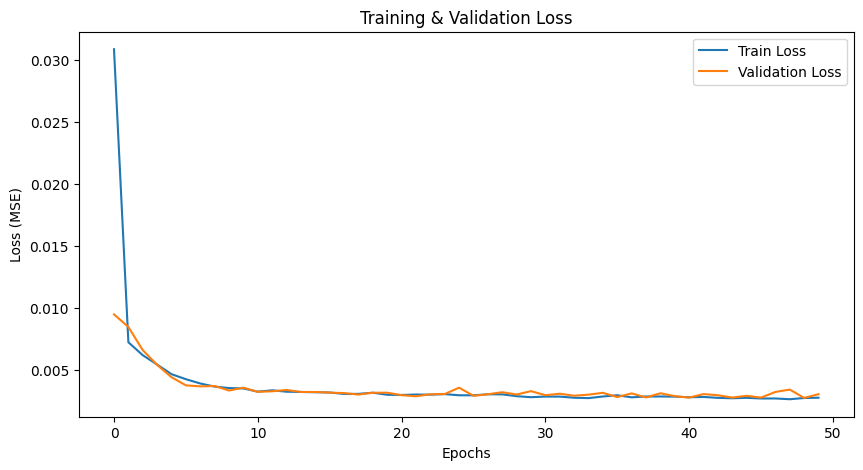

In [20]:

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)  # Ensure shape compatibility

# Predict on test data
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Convert predictions and ground truth back to numpy
y_pred = y_pred_tensor.cpu().numpy().flatten()
y_test = y_test_tensor.cpu().numpy().flatten()

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print results
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Percentage Error (MAPE): 7.21%
Mean Absolute Error (MAE): 0.0405
Root Mean Squared Error (RMSE): 0.0508


In [22]:
# Reshape the predictions and ground truth for inverse transformation
y_pred_reshaped = y_pred.reshape(-1, 1)  # Reshape to 2D
y_test_reshaped = y_test.reshape(-1, 1)

# Create a dummy array to match the scaler's expected shape (18 features)
dummy_array = np.zeros((len(y_pred), 18))
dummy_array[:, 2] = y_pred_reshaped.flatten()  # Assign values to the 3rd column (temp)

# Inverse transform using the scaler
y_pred_rescaled = scaler.inverse_transform(dummy_array)[:, 2]  # Extract only the temp column

# Do the same for y_test
dummy_array[:, 2] = y_test_reshaped.flatten()  # Assign values to the 3rd column (temp)
y_test_rescaled = scaler.inverse_transform(dummy_array)[:, 2]  # Extract only the temp column


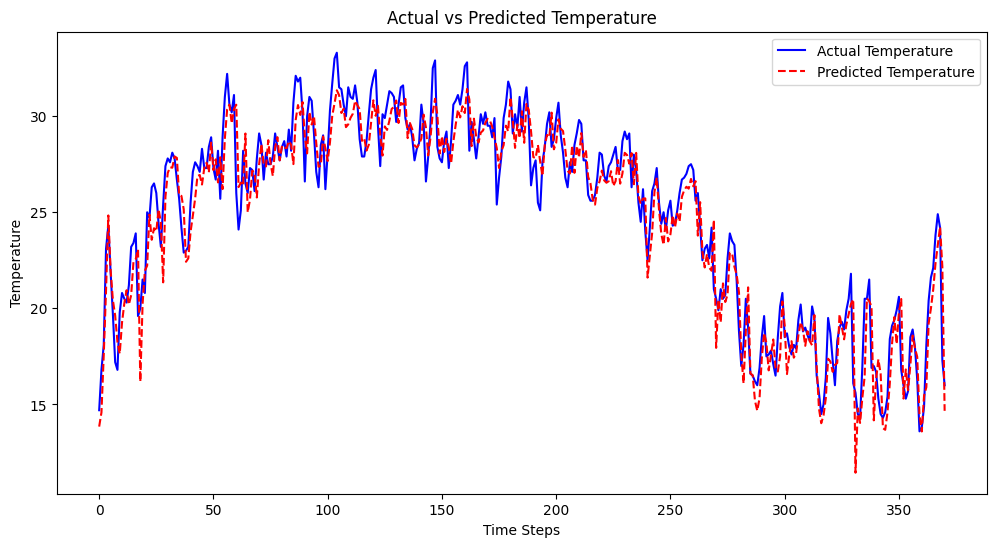

In [25]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Temperature", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Temperature", color="red", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.show()

In [27]:
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100  # Mean Absolute Percentage Error

# Print results
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Percentage Error (MAPE): 4.89%
Mean Absolute Error (MAE): 1.1544
Root Mean Squared Error (RMSE): 1.4489
